,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),동,층,매수자,매도자,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,등기일자
0,1,서울특별시 동대문구 답십리동,994,994,0,답십리한화,84.860,202412,31,"91,500",201,13,개인,개인,2001,고미술로 57,-,중개거래,서울 동대문구,25.03.19
1,2,서울특별시 동대문구 답십리동,530-15,530,15,현대썬앤빌청계,23.520,202412,31,"23,000",1,7,개인,개인,2016,고미술로 71,-,중개거래,서울 동대문구,24.12.31
2,3,서울특별시 성동구 금호동4가,235,235,0,서울숲2차푸르지오,114.771,202412,31,"207,000",-,3,개인,개인,2012,금호로 17,20250122,중개거래,서울 성동구,-
3,4,서울특별시 성동구 금호동4가,235,235,0,서울숲2차푸르지오,114.771,202412,31,"207,000",202,3,개인,개인,2012,금호로 17,-,중개거래,서울 성동구,25.03.24
4,5,서울특별시 용산구 이촌동,300-23,300,23,한강맨숀,101.950,202412,31,"409,940",16,4,개인,개인,1971,이촌로 248,-,중개거래,"서울 서초구, 서울 용산구",25.01.21


종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 57458행 x 20열
- 메모리 사용량: 48.19mb
- 수치형 변수: 8개
- 범주형 변수: 12개

2. 결측값 분석
결측값 없음. 완전

3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,NO,28729.500,16586.840,1.00,57458.00,-0.000,-1.200,0.000,100.000
1,본번,623.356,624.617,1.00,4974.00,3.520,20.337,2.804,2.471
2,부번,4.203,34.482,0.00,2837.00,32.436,1733.064,21.534,0.346
3,전용면적(㎡),76.356,28.833,11.48,273.96,1.160,3.769,8.688,11.276
4,계약년월,202406.571,2.922,202401.00,202412.00,0.025,-0.690,0.000,0.021
5,계약일,16.107,8.802,1.00,31.00,-0.033,-1.194,0.000,0.054
6,층,9.878,6.549,-2.00,68.00,1.190,2.902,1.599,0.111
7,건축년도,2003.415,11.272,1965.00,2024.00,-0.168,-0.599,0.082,0.104



4. 분포 이상 감지

- 극심한 왜도(|skewness| > 2)
--본번: 왜도 =  3.520000
--부번: 왜도 =  32.436000

- 높은 이상값 비율(>5%)
['부번', '전용면적(㎡)']
--부번: 이상값 = 21.5%
--전용면적(㎡): 이상값 = 8.7%
=== 종합 이상값 탐지 시스템 ===
1. 일변량 이상값 탐지 (IQR 방법)
  본번: 1611개 (2.8%)
  부번: 12373개 (21.5%)
  전용면적(㎡): 4992개 (8.7%)
  층: 919개 (1.6%)
  건축년도: 47개 (0.1%)

2. 다변량 이상값 탐지 (마할라노비스 거리)
 임계값(거리): 5.11
 다변량 이상값: 1218개 (2.1%)

3. 다변량 이상값 탐지(Isolation Forest)
  Isolation Forest 이상값: 5746개 (10.0%)

 == 최종 이상값: 4974개 (8.7%)
=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)


ValueError: No group keys passed!

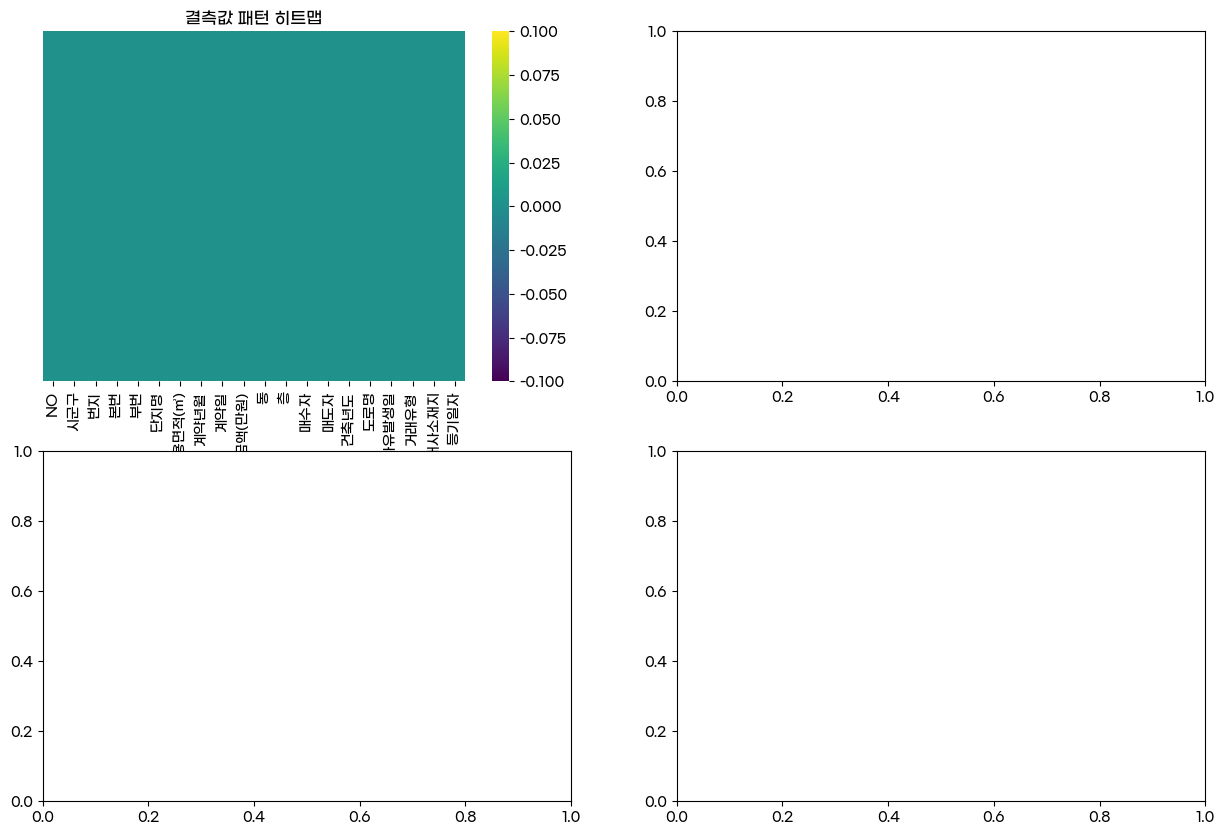

In [9]:
# 파일 불러오기

# with open('./apartment_0813.csv', encoding='EUC-KR') as f:
#     print(f.readline())


import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.spatial import distance
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

plt.rcParams['font.family'] = 'Gmarket Sans'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./seoul_apt_2024.csv', encoding='EUC-KR')


display(df.head())

from da_utils import profile, outliers, pattern

profile.get_data_profile(df)
outliers.outlier_detection(df)
pattern.analyze_missing_patterns(df)


In [ ]:
# pandas로 csv -> dataframe으로 불러오기.
import pandas as pd

# 인코딩은 파일 불러올 떄 매우 중요함
# "NO","시군구","번지","본번","부번","단지명","전월세구분","전용면적(㎡)","계약년월","계약일","보증금(만원)","월세금(만원)","층","건축년도","도로명","계약기간","계약구분","갱신요구권 사용","종전계약 보증금(만원)","종전계약 월세(만원)","주택유형"
# "1","서울특별시 강동구 길동","400","0400","0000","길동우성","전세","57.1000","202508","12","43,000","0","3","1994","천호대로193길 37","202509~202709","신규","-","","","아파트"
df = pd.read_csv('./apartment_0813.csv', encoding='EUC KR', low_memory=False)
df = pd.read_csv('./apartment_0813.csv', encoding='EUC KR', dtype={
    'ISBN': str,
    "NO": int,
    "시군구": str,
    "번지": int,
    "본번": int,
    "부번": int,
    "단지명": str,
    "전월세구분": str,
    "전용면적(㎡)": float,
    "계약년월": str,
    "계약일": int,
    "보증금(만원)": int,
    "월세금(만원)","층","건축년도","도로명","계약기간","계약구분","갱신요구권 사용","종전계약 보증금(만원)","종전계약 월세(만원)","주택유형"
})

ParserError: Error tokenizing data. C error: Expected 1 fields in line 16, saw 21
